In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [42]:
# Путь к файлу с данными
df = pd.read_csv('../data/train.csv')

# Перевод 'Survived' в категориальный тип
df['Survived'] = pd.Categorical(df['Survived'], categories=[0, 1], ordered=True)

# Читаемые метки для категориальных признаков
df['Survived_label'] = df['Survived'].map({0: 'Не выжил', 1: 'Выжил'})

In [13]:
# Размерность датасета и первые строки
print(f"Размерность датасета: {df.shape}")
print(df.head())

Размерность датасета: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373

In [14]:
# Общая информация о датасете
print("\nОбщая информация о датасете:")
print(df.info())


Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [15]:
# Статистика по числовым признакам
print("\nСтатистика по числовым признакам:")
print(df.describe())


Статистика по числовым признакам:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [68]:
# Проверка на пропуски
print("\nПроверка на пропуски:")
print(df.isnull().sum())


Проверка на пропуски:
PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Survived_label      0
dtype: int64


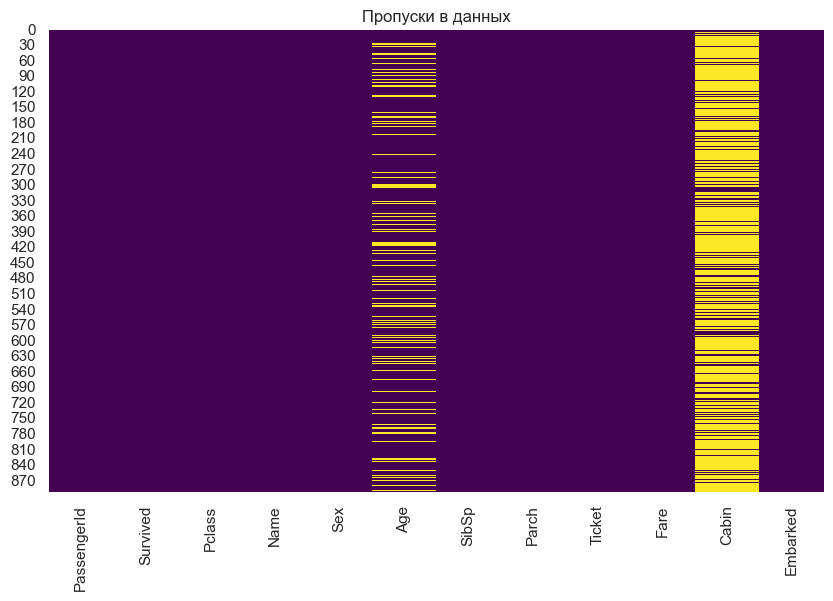

In [18]:
# Проверка пропусков визуально
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропуски в данных')
plt.show()

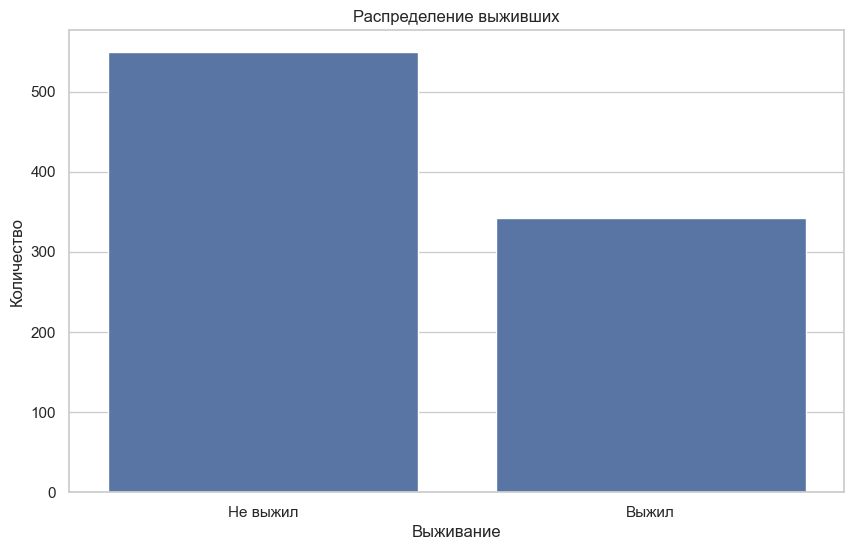

In [ ]:
# Распределение целевой переменной 'Survived'
sns.countplot(x='Survived', data=df)
plt.title('Распределение выживших')
plt.xlabel('Выживание')
plt.ylabel('Количество')
plt.xticks([0, 1], ['Не выжил', 'Выжил'])
plt.show()

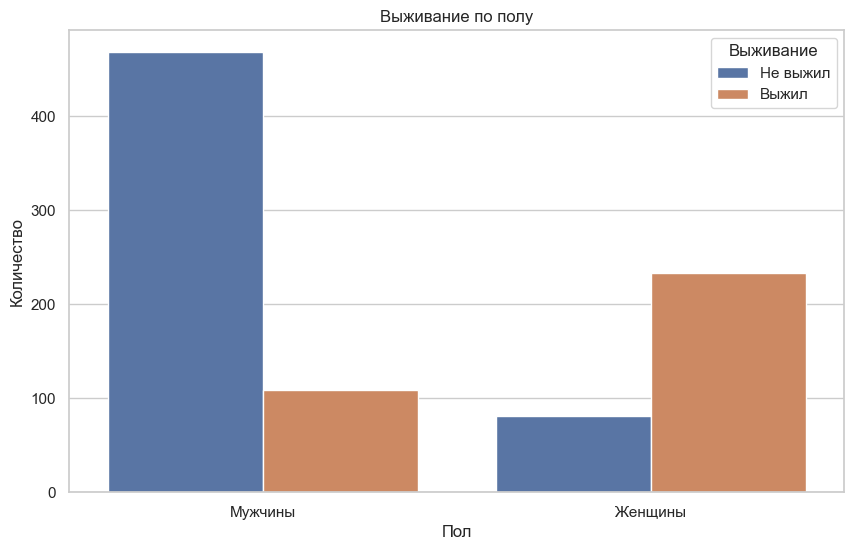

In [53]:
# Данные по полу, классу, возрасту и выживанию
sns.countplot(data=df, x='Sex', hue='Survived_label')
plt.title('Выживание по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(['male', 'female'], ['Мужчины', 'Женщины'])
plt.legend(title="Выживание", loc='upper right')
plt.show()

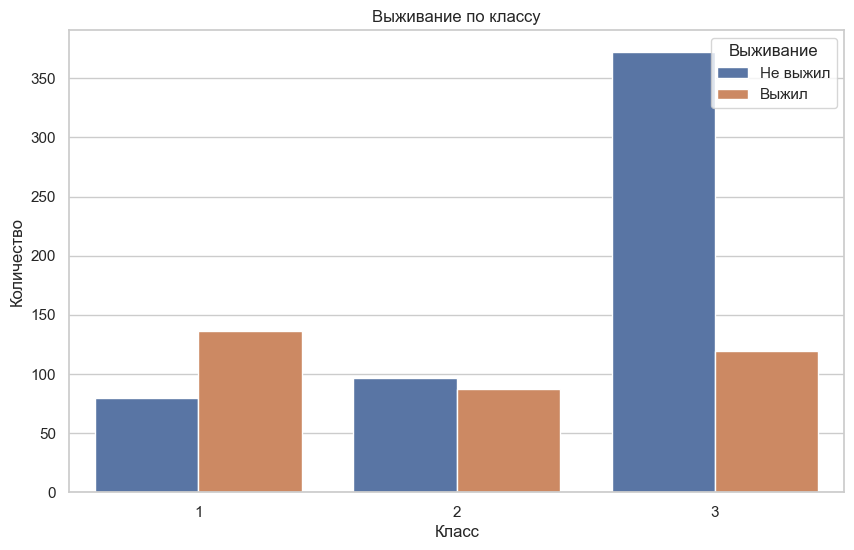

In [54]:
sns.countplot(data=df, x='Pclass', hue='Survived_label')
plt.title('Выживание по классу')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title="Выживание", loc='upper right')
plt.show() 

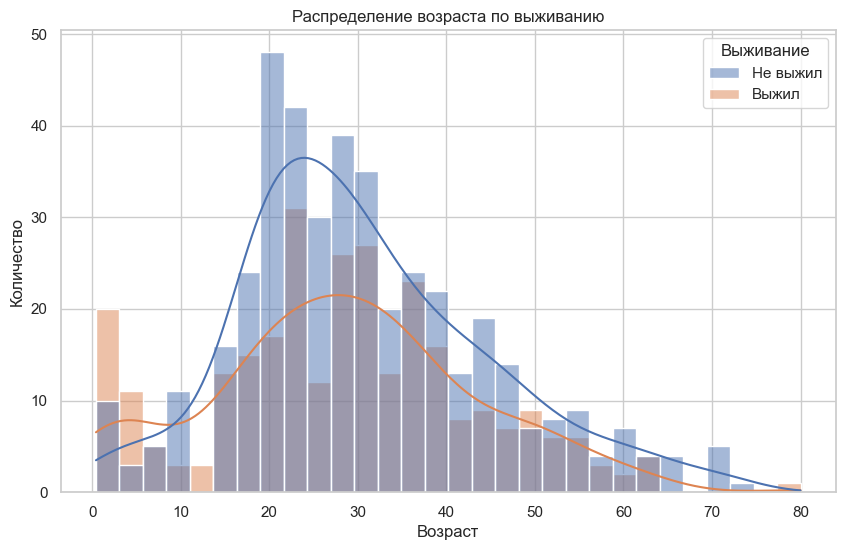

In [65]:
plot = sns.histplot(data=df, x='Age', hue='Survived_label', kde=True, bins=30)
plot.legend_.set_title("Выживание") # Установка заголовка легенды, kde=True может создавать объекты без метки
plt.title('Распределение возраста по выживанию')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Text(0.5, 1.0, 'Корреляция между числовыми признаками')

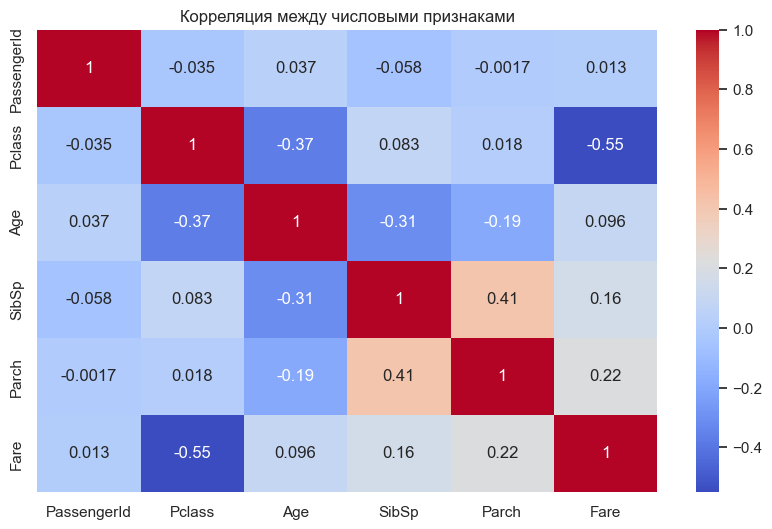

In [67]:
# Корреляция между числовыми признаками

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между числовыми признаками')